<a href="https://colab.research.google.com/github/priyalbisht/fake-review-detection/blob/main/Final_FRD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_json('/content/sample_data/electronics_reviews_uniq.json')

In [ ]:
data.head()

,_id,average_rating,category,crawled_at,description,dislikes,images,likes,location,price,product,rating,review_title,review_uniq_id,reviewed_at,reviewed_by,url,verified_purchase
0,02d51a4b-63b9-5e74-b93d-b787a6fcca73,4.4,Mobiles,2021-02-09 01:37:30,1) Camera quality : Awesome ... it generates g...,126,[https://rukminim1.flixcart.com/blobio/124/124...,706,Veraval,"₹13,999","Honor 10 Lite (Midnight Black, 32 GB)",5,Super!,review-7a2e3f5a-8617-4d72-8197-f76cab306b26,NaT,Humayun Khariwala,https://www.flipkart.com/honor-10-lite-midnigh...,True
1,b853b987-bdb1-59b9-9eae-78fa005aa10a,4.4,Mobiles,2021-02-09 01:37:30,"Awesome mobile , I got it with in 2 days .shap...",55,[https://rukminim1.flixcart.com/blobio/124/124...,200,Thuraiyur,"₹13,999","Honor 10 Lite (Midnight Black, 32 GB)",5,Terrific purchase,review-817e340a-083b-474a-a170-99fac3860788,NaT,B.Sundar Ahmed,https://www.flipkart.com/honor-10-lite-midnigh...,True
2,ad8f5bc2-6371-5f4a-879b-a273cb806e96,4.4,Mobiles,2021-02-09 01:37:30,Honor 10 lite :Pros :-1) Cameras are good 24MP...,2,[],28,Bengaluru,"₹13,999","Honor 10 Lite (Midnight Black, 32 GB)",4,Delightful,review-21ad7f1d-7897-484d-9eef-300cd023b124,NaT,Chethan Raj,https://www.flipkart.com/honor-10-lite-midnigh...,True
3,bbb5586d-aeca-51c4-a40c-63a406e6fb92,4.4,Mobiles,2021-02-09 01:37:30,"Superb camera, beautiful and slim design, ligh...",4,[https://rukminim1.flixcart.com/blobio/124/124...,26,Kolkata,"₹13,999","Honor 10 Lite (Midnight Black, 32 GB)",5,Brilliant,review-fa941459-c16f-4d80-be40-9e9a8264c0c2,NaT,Akash Mondal,https://www.flipkart.com/honor-10-lite-midnigh...,True
4,d1e0e371-354a-5784-8d27-cc6bc520f0b4,4.4,Mobiles,2021-02-09 01:37:30,good and best mobil honor is best company,1,[https://rukminim1.flixcart.com/blobio/124/124...,10,Certified Buyer,"₹13,999","Honor 10 Lite (Midnight Black, 32 GB)",5,Must buy!,review-93ba8af1-5b00-4183-a4b2-9dac279a44c4,NaT,Manish varmora Ramjibhai,https://www.flipkart.com/honor-10-lite-midnigh...,True


<h1> STEP 1 : PRE PROCESSING STEP:


Here, _id and crawled_at columns are not relevant to our analysis as they were acquired during scraping of the dataset. (Done by an external source)

In [ ]:
data = data.drop(["_id","crawled_at"],axis=1)

In [ ]:
data.shape

(15166, 16)

In [ ]:
data.isna().sum()

average_rating           0
category                 0
description              0
dislikes                 0
images                   0
likes                    0
location                 0
price                    0
product                  0
rating                   0
review_title             0
review_uniq_id           0
reviewed_at          11627
reviewed_by              0
url                      0
verified_purchase        0
dtype: int64

The reviewed_at column contains times at which reviews were posted.
<p> Since the column contains more than 75% NaN values, it will not result in a significant contribution in predicting fakeness of a review.

Dropping "reviewed_at" column.

In [ ]:
data = data.drop(["reviewed_at"],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15166 entries, 0 to 15165
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   average_rating     15166 non-null  float64
 1   category           15166 non-null  object 
 2   description        15166 non-null  object 
 3   dislikes           15166 non-null  int64  
 4   images             15166 non-null  object 
 5   likes              15166 non-null  int64  
 6   location           15166 non-null  object 
 7   price              15166 non-null  object 
 8   product            15166 non-null  object 
 9   rating             15166 non-null  int64  
 10  review_title       15166 non-null  object 
 11  review_uniq_id     15166 non-null  object 
 12  reviewed_by        15166 non-null  object 
 13  url                15166 non-null  object 
 14  verified_purchase  15166 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(10)
memory usage: 1.6+ MB


In [ ]:
data.shape

(15166, 15)

In [ ]:
data['images'].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          14197
[https://rukminim1.flixcart.com/blobio/124/124/201904/blobio-201904_3m2746ht.jpg?q=90, https://rukminim1.flixcart.com/blobio/124/124/201904/blobio-201904_mcgufrtn.jpg?q=90, https://rukminim1.flixcart.com/blobio/124/124/201904/blobio-201904_5vi1d4rr.jpg?q=90, https://rukminim1.flixcart.com/blobio/124/124/201904/blobio-201904_7obn14j9.jpg?q=90, https://rukminim1.flixcart.com/blobio/124/124/201904/blobio-201904_olkjikuc.jpg?q=90]                                                  1
[https://rukminim1.flixcart.com/blob

Our analysis is based on whether or not a review contains an image attached to it.

Hence, we will only have 1 or 0 in the images column.
<p> 1 - image is present
<p> 0 - image is not present

In [ ]:
data['images'] = data['images'].apply(lambda x: 'no' if len(x) == 0 else 'yes')

In [ ]:
image_mapping = {'yes': 1, 'no': 0}
data['images'] = data['images'].map(image_mapping)

In [ ]:
data

,average_rating,category,description,dislikes,images,likes,location,price,product,rating,review_title,review_uniq_id,reviewed_by,url,verified_purchase
0,4.4,Mobiles,1) Camera quality : Awesome ... it generates g...,126,1,706,Veraval,"₹13,999","Honor 10 Lite (Midnight Black, 32 GB)",5,Super!,review-7a2e3f5a-8617-4d72-8197-f76cab306b26,Humayun Khariwala,https://www.flipkart.com/honor-10-lite-midnigh...,True
1,4.4,Mobiles,"Awesome mobile , I got it with in 2 days .shap...",55,1,200,Thuraiyur,"₹13,999","Honor 10 Lite (Midnight Black, 32 GB)",5,Terrific purchase,review-817e340a-083b-474a-a170-99fac3860788,B.Sundar Ahmed,https://www.flipkart.com/honor-10-lite-midnigh...,True
2,4.4,Mobiles,Honor 10 lite :Pros :-1) Cameras are good 24MP...,2,0,28,Bengaluru,"₹13,999","Honor 10 Lite (Midnight Black, 32 GB)",4,Delightful,review-21ad7f1d-7897-484d-9eef-300cd023b124,Chethan Raj,https://www.flipkart.com/honor-10-lite-midnigh...,True
3,4.4,Mobiles,"Superb camera, beautiful and slim design, ligh...",4,1,26,Kolkata,"₹13,999","Honor 10 Lite (Midnight Black, 32 GB)",5,Brilliant,review-fa941459-c16f-4d80-be40-9e9a8264c0c2,Akash Mondal,https://www.flipkart.com/honor-10-lite-midnigh...,True
4,4.4,Mobiles,good and best mobil honor is best company,1,1,10,Certified Buyer,"₹13,999","Honor 10 Lite (Midnight Black, 32 GB)",5,Must buy!,review-93ba8af1-5b00-4183-a4b2-9dac279a44c4,Manish varmora Ramjibhai,https://www.flipkart.com/honor-10-lite-midnigh...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15161,4.3,Mobiles,Awesome camera good quality but should improve...,0,0,0,Thrissur,"₹19,999","Honor 9i (Aurora Blue, 64 GB)",4,Good choice,review-05ed9c3c-646b-4b57-aad0-e15bc1fc2d4b,Alen Jose anto,https://www.flipkart.com/honor-9i-aurora-blue-...,True
15162,4.3,Mobiles,Just fantastic mobile at this rate .only minus...,0,0,0,Virudhunagar,"₹19,999","Honor 9i (Aurora Blue, 64 GB)",5,Best in the market!,review-c69b2f4f-324a-4dac-ab26-1da5462747a9,rajkumar jayachandran,https://www.flipkart.com/honor-9i-aurora-blue-...,True
15163,4.3,Mobiles,Nine device. only one con no grayoscope .,0,0,0,Ashta,"₹19,999","Honor 9i (Aurora Blue, 64 GB)",4,Worth the money,review-d22e7617-dffc-4f84-a3fb-154350ed4ced,Sagar Patil,https://www.flipkart.com/honor-9i-aurora-blue-...,True
15164,4.3,Mobiles,"Awesome phone, nice cameras and touch is like ...",0,0,0,Thane,"₹19,999","Honor 9i (Aurora Blue, 64 GB)",5,Terrific,review-318eb1a7-5408-4f9a-8857-c959bb3b09f4,Nikhil Chaudhari,https://www.flipkart.com/honor-9i-aurora-blue-...,True


Converting price values from object to integer:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15166 entries, 0 to 15165
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   average_rating     15166 non-null  float64
 1   category           15166 non-null  object 
 2   description        15166 non-null  object 
 3   dislikes           15166 non-null  int64  
 4   images             15166 non-null  int64  
 5   likes              15166 non-null  int64  
 6   location           15166 non-null  object 
 7   price              15166 non-null  object 
 8   product            15166 non-null  object 
 9   rating             15166 non-null  int64  
 10  review_title       15166 non-null  object 
 11  review_uniq_id     15166 non-null  object 
 12  reviewed_by        15166 non-null  object 
 13  url                15166 non-null  object 
 14  verified_purchase  15166 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(9)
memory usage: 1.6+ MB


In [ ]:
data['price'].value_counts()

₹19,999    5714
₹15,999    3952
₹13,999    2849
₹5,999     2641
₹29,999      10
Name: price, dtype: int64

We need to convert the values in 'price' column from object to int.

Removing ₹ and , from the prices and converting to string, we get:

In [ ]:
data['price'] = data['price'].str.replace('₹', '').str.replace(',', '').astype(int)

In [ ]:
data['price']

0        13999
1        13999
2        13999
3        13999
4        13999
         ...  
15161    19999
15162    19999
15163    19999
15164    19999
15165    19999
Name: price, Length: 15166, dtype: int64

In [ ]:
data['price'] = data['price'].astype(int)

In [ ]:
data['price']

0        13999
1        13999
2        13999
3        13999
4        13999
         ...  
15161    19999
15162    19999
15163    19999
15164    19999
15165    19999
Name: price, Length: 15166, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15166 entries, 0 to 15165
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   average_rating     15166 non-null  float64
 1   category           15166 non-null  object 
 2   description        15166 non-null  object 
 3   dislikes           15166 non-null  int64  
 4   images             15166 non-null  int64  
 5   likes              15166 non-null  int64  
 6   location           15166 non-null  object 
 7   price              15166 non-null  int64  
 8   product            15166 non-null  object 
 9   rating             15166 non-null  int64  
 10  review_title       15166 non-null  object 
 11  review_uniq_id     15166 non-null  object 
 12  reviewed_by        15166 non-null  object 
 13  url                15166 non-null  object 
 14  verified_purchase  15166 non-null  bool   
dtypes: bool(1), float64(1), int64(5), object(8)
memory usage: 1.6+ MB


Price column has successfully been converted to numerical values.

In [ ]:
data['verified_purchase'].value_counts()

True    15166
Name: verified_purchase, dtype: int64

Since all purchases in this dataset are verified, this column is not relevant to our analysis.

Dropping 'verified_purchase' column

In [ ]:
data = data.drop(columns=['verified_purchase'])

In [ ]:
data['reviewed_by'].value_counts()

Flipkart Customer       3078
Amit Kumar                11
Mukesh Kumar               9
Raj Kumar                  9
My Account                 7
                        ... 
Mohamed Mubarak            1
S MALLI KARJUNA RAJU       1
Vijay Mohite               1
Omkar Bodkhe               1
Praveen Kumar Biswas       1
Name: reviewed_by, Length: 11513, dtype: int64

In [ ]:
data = data[data['reviewed_by']!='Flipkart Customer']

In [ ]:
data

,average_rating,category,description,dislikes,images,likes,location,price,product,rating,review_title,review_uniq_id,reviewed_by,url
0,4.4,Mobiles,1) Camera quality : Awesome ... it generates g...,126,1,706,Veraval,13999,"Honor 10 Lite (Midnight Black, 32 GB)",5,Super!,review-7a2e3f5a-8617-4d72-8197-f76cab306b26,Humayun Khariwala,https://www.flipkart.com/honor-10-lite-midnigh...
1,4.4,Mobiles,"Awesome mobile , I got it with in 2 days .shap...",55,1,200,Thuraiyur,13999,"Honor 10 Lite (Midnight Black, 32 GB)",5,Terrific purchase,review-817e340a-083b-474a-a170-99fac3860788,B.Sundar Ahmed,https://www.flipkart.com/honor-10-lite-midnigh...
2,4.4,Mobiles,Honor 10 lite :Pros :-1) Cameras are good 24MP...,2,0,28,Bengaluru,13999,"Honor 10 Lite (Midnight Black, 32 GB)",4,Delightful,review-21ad7f1d-7897-484d-9eef-300cd023b124,Chethan Raj,https://www.flipkart.com/honor-10-lite-midnigh...
3,4.4,Mobiles,"Superb camera, beautiful and slim design, ligh...",4,1,26,Kolkata,13999,"Honor 10 Lite (Midnight Black, 32 GB)",5,Brilliant,review-fa941459-c16f-4d80-be40-9e9a8264c0c2,Akash Mondal,https://www.flipkart.com/honor-10-lite-midnigh...
4,4.4,Mobiles,good and best mobil honor is best company,1,1,10,Certified Buyer,13999,"Honor 10 Lite (Midnight Black, 32 GB)",5,Must buy!,review-93ba8af1-5b00-4183-a4b2-9dac279a44c4,Manish varmora Ramjibhai,https://www.flipkart.com/honor-10-lite-midnigh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15161,4.3,Mobiles,Awesome camera good quality but should improve...,0,0,0,Thrissur,19999,"Honor 9i (Aurora Blue, 64 GB)",4,Good choice,review-05ed9c3c-646b-4b57-aad0-e15bc1fc2d4b,Alen Jose anto,https://www.flipkart.com/honor-9i-aurora-blue-...
15162,4.3,Mobiles,Just fantastic mobile at this rate .only minus...,0,0,0,Virudhunagar,19999,"Honor 9i (Aurora Blue, 64 GB)",5,Best in the market!,review-c69b2f4f-324a-4dac-ab26-1da5462747a9,rajkumar jayachandran,https://www.flipkart.com/honor-9i-aurora-blue-...
15163,4.3,Mobiles,Nine device. only one con no grayoscope .,0,0,0,Ashta,19999,"Honor 9i (Aurora Blue, 64 GB)",4,Worth the money,review-d22e7617-dffc-4f84-a3fb-154350ed4ced,Sagar Patil,https://www.flipkart.com/honor-9i-aurora-blue-...
15164,4.3,Mobiles,"Awesome phone, nice cameras and touch is like ...",0,0,0,Thane,19999,"Honor 9i (Aurora Blue, 64 GB)",5,Terrific,review-318eb1a7-5408-4f9a-8857-c959bb3b09f4,Nikhil Chaudhari,https://www.flipkart.com/honor-9i-aurora-blue-...


Factors like unique review id and the url of the product are not relevant to detecting authenticity of a review.

In [ ]:
data = data.drop(columns=['review_uniq_id','url'])

In [ ]:
data['category'].value_counts()

Mobiles    12088
Name: category, dtype: int64

Since category has only one unique value, it will not make any contribution to the outcome.

Dropping Category column.

In [ ]:
data = data.drop(columns=['category'])

In [ ]:
data['average_rating'].value_counts()

4.3    7780
4.4    2255
3.8    2053
Name: average_rating, dtype: int64

The average rating of a product is not relevant to fake revuew detection. The relevant factor is the rating that every individual review has, which is contained in the "rating" column.

Dropping "average_rating".

In [ ]:
data = data.drop(columns=['average_rating'])

In [ ]:
data['product'].value_counts()

Honor 9N (Midnight Black, 64 GB)         3201
Honor 9N (Midnight Black, 128 GB)        2871
Honor 10 Lite (Midnight Black, 32 GB)    2245
Honor 9S (Black, 32 GB)                  1807
Honor 9i (Aurora Blue, 64 GB)            1708
Honor 9S (Blue, 32 GB)                    246
Honor 8                                    10
Name: product, dtype: int64

Since there are only 7 distinct products, reviewers with reviews more then 7 are highly likely to post fake reviews in the form of spam.

Encoding values of 'location', 'product' and 'images' column for analysis by ML model.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['location'] = label_encoder.fit_transform(data['location'])
data['product'] = label_encoder.fit_transform(data['product'])

In [ ]:
data

,description,dislikes,images,likes,location,price,product,rating,review_title,reviewed_by
0,1) Camera quality : Awesome ... it generates g...,126,1,706,2593,13999,0,5,Super!,Humayun Khariwala
1,"Awesome mobile , I got it with in 2 days .shap...",55,1,200,2448,13999,0,5,Terrific purchase,B.Sundar Ahmed
2,Honor 10 lite :Pros :-1) Cameras are good 24MP...,2,0,28,320,13999,0,4,Delightful,Chethan Raj
3,"Superb camera, beautiful and slim design, ligh...",4,1,26,1306,13999,0,5,Brilliant,Akash Mondal
4,good and best mobil honor is best company,1,1,10,467,13999,0,5,Must buy!,Manish varmora Ramjibhai
...,...,...,...,...,...,...,...,...,...,...
15161,Awesome camera good quality but should improve...,0,0,0,2445,19999,6,4,Good choice,Alen Jose anto
15162,Just fantastic mobile at this rate .only minus...,0,0,0,2611,19999,6,5,Best in the market!,rajkumar jayachandran
15163,Nine device. only one con no grayoscope .,0,0,0,137,19999,6,4,Worth the money,Sagar Patil
15164,"Awesome phone, nice cameras and touch is like ...",0,0,0,2415,19999,6,5,Terrific,Nikhil Chaudhari


<h1> STEP 2 : SENTIMENT ANALYSIS OF REVIEW TITLE AND REVIEW DESCRIPTION.

<h3> TEXT CLEANING

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
punctuation = '"#$%&\'()*+-/:;<=>?@[\\]^_`{|}~'
numbers = "0123456789"

def remove_emojis(text):
    text_without_emojis = ''.join(char for char in text if ord(char) < 128)
    return text_without_emojis

def clean_text(text):
    text = remove_emojis(text)
    clean_list = [x for x in text if x not in string.punctuation]
    clean_list = [x for x in clean_list if not x.isdigit()]
    clean_list = [x.lower() for x in clean_list]
    cleaned_text = ''.join(clean_list)
    return cleaned_text

We won't be getting rid of stop words as they might cause inaccurate results.
<p> For example, removal of stop words like 'not' from 'not good' or 'but' from 'good, but' would result in inaccurate sentiment analysis.

In [ ]:
data["review_title"] = data["review_title"].apply(clean_text)

In [ ]:
data["description"] = data["description"].apply(clean_text)

In [ ]:
from textblob import TextBlob
data.head()

,description,dislikes,images,likes,location,price,product,rating,review_title,reviewed_by
0,camera quality awesome it generates good co...,126,1,706,2593,13999,0,5,super,Humayun Khariwala
1,awesome mobile i got it with in days shappir...,55,1,200,2448,13999,0,5,terrific purchase,B.Sundar Ahmed
2,honor lite pros cameras are good mp camera a...,2,0,28,320,13999,0,4,delightful,Chethan Raj
3,superb camera beautiful and slim design light ...,4,1,26,1306,13999,0,5,brilliant,Akash Mondal
4,good and best mobil honor is best company,1,1,10,467,13999,0,5,must buy,Manish varmora Ramjibhai


In [ ]:
data["polarity"] = data["description"].apply(lambda x: TextBlob(x).sentiment.polarity)
data["review_length"] = data["description"].apply(lambda x: len(x))
data["word_count"] = data["description"].apply(lambda x: len(x.split()))

In [ ]:
data["title_polarity"] = data["review_title"].apply(lambda x: TextBlob(x).sentiment.polarity)
data["title_length"] = data["review_title"].apply(lambda x: len(x))
data["title_word_count"] = data["review_title"].apply(lambda x: len(x.split()))

In [ ]:
def average_word_length(x):
    words = x.split()
    word_length = 0
    for word in words:
        word_length += len(word)
    if(len(words)):
      return word_length/len(words)
    else:
      return 0

In [ ]:
data["avg_word_length"] = data["description"].apply(lambda x: average_word_length(x))

In [ ]:
data["title_avg_word_length"] = data["review_title"].apply(lambda x: average_word_length(x))

In [ ]:
data.head()

,description,dislikes,images,likes,location,price,product,rating,review_title,reviewed_by,polarity,review_length,word_count,title_polarity,title_length,title_word_count,avg_word_length,title_avg_word_length
0,camera quality awesome it generates good co...,126,1,706,2593,13999,0,5,super,Humayun Khariwala,0.525000,382,66,0.333333,5,1,4.515152,5.0
1,awesome mobile i got it with in days shappir...,55,1,200,2448,13999,0,5,terrific purchase,B.Sundar Ahmed,0.632941,445,75,0.000000,17,2,4.906667,8.0
2,honor lite pros cameras are good mp camera a...,2,0,28,320,13999,0,4,delightful,Chethan Raj,0.516667,453,78,1.000000,10,1,4.551282,10.0
3,superb camera beautiful and slim design light ...,4,1,26,1306,13999,0,5,brilliant,Akash Mondal,0.633333,167,31,0.900000,9,1,4.419355,9.0
4,good and best mobil honor is best company,1,1,10,467,13999,0,5,must buy,Manish varmora Ramjibhai,0.900000,41,8,0.000000,8,2,4.250000,3.5


Done with polarity, word length and word count.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12088 entries, 0 to 15165
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   description            12088 non-null  object 
 1   dislikes               12088 non-null  int64  
 2   images                 12088 non-null  int64  
 3   likes                  12088 non-null  int64  
 4   location               12088 non-null  int64  
 5   price                  12088 non-null  int64  
 6   product                12088 non-null  int64  
 7   rating                 12088 non-null  int64  
 8   review_title           12088 non-null  object 
 9   reviewed_by            12088 non-null  object 
 10  polarity               12088 non-null  float64
 11  review_length          12088 non-null  int64  
 12  word_count             12088 non-null  int64  
 13  title_polarity         12088 non-null  float64
 14  title_length           12088 non-null  int64  
 15  ti

<h1> STEP 3 : Creating a separate dataframe which will consist of customer data for value-based Customer Segmentation.

We will create a DataFrame named "df" with the following columns:
*   Customer name (reviewed_by)
*   Total reviews posted by the customer (reviews_given)
*   Average expenditure per person (avg_expend)
*   Positive Review Count
*   Negative Review Count
*   The customer is a promoter or a demoter (is_promoter)



In [ ]:
data['reviewed_by'].value_counts()

Amit Kumar              11
Mukesh Kumar             9
Raj Kumar                9
Pankaj Kumar             7
Manoj Kumar              7
                        ..
Mohamed Mubarak          1
S MALLI KARJUNA RAJU     1
Vijay Mohite             1
Omkar Bodkhe             1
Praveen Kumar Biswas     1
Name: reviewed_by, Length: 11512, dtype: int64

In [ ]:
value_counts = data['reviewed_by'].value_counts()

In [ ]:
value_counts

Amit Kumar              11
Mukesh Kumar             9
Raj Kumar                9
Pankaj Kumar             7
Manoj Kumar              7
                        ..
Mohamed Mubarak          1
S MALLI KARJUNA RAJU     1
Vijay Mohite             1
Omkar Bodkhe             1
Praveen Kumar Biswas     1
Name: reviewed_by, Length: 11512, dtype: int64

In [ ]:
df = value_counts.to_frame().reset_index()

In [ ]:
df

,index,reviewed_by
0,Amit Kumar,11
1,Mukesh Kumar,9
2,Raj Kumar,9
3,Pankaj Kumar,7
4,Manoj Kumar,7
...,...,...
11507,Mohamed Mubarak,1
11508,S MALLI KARJUNA RAJU,1
11509,Vijay Mohite,1
11510,Omkar Bodkhe,1


In [ ]:
df = df.rename(columns={'reviewed_by':'reviews_given','index':'reviewed_by'})

Creating a new column for average expenditure of each customer.

In [ ]:
df['avg_expend'] = None

In [ ]:
df

,reviewed_by,reviews_given,avg_expend
0,Amit Kumar,11,None
1,Mukesh Kumar,9,None
2,Raj Kumar,9,None
3,Pankaj Kumar,7,None
4,Manoj Kumar,7,None
...,...,...,...
11507,Mohamed Mubarak,1,None
11508,S MALLI KARJUNA RAJU,1,None
11509,Vijay Mohite,1,None
11510,Omkar Bodkhe,1,None


In [ ]:
temp = data[['price','reviewed_by']]
temp

,price,reviewed_by
0,13999,Humayun Khariwala
1,13999,B.Sundar Ahmed
2,13999,Chethan Raj
3,13999,Akash Mondal
4,13999,Manish varmora Ramjibhai
...,...,...
15161,19999,Alen Jose anto
15162,19999,rajkumar jayachandran
15163,19999,Sagar Patil
15164,19999,Nikhil Chaudhari


In [ ]:
average_expenditure = temp.groupby('reviewed_by')['price'].mean()

In [ ]:
df['avg_expend'] = df['reviewed_by'].map(average_expenditure)

In [ ]:
df

,reviewed_by,reviews_given,avg_expend
0,Amit Kumar,11,17453.545455
1,Mukesh Kumar,9,13776.777778
2,Raj Kumar,9,16221.222222
3,Pankaj Kumar,7,13427.571429
4,Manoj Kumar,7,16570.428571
...,...,...,...
11507,Mohamed Mubarak,1,19999.000000
11508,S MALLI KARJUNA RAJU,1,19999.000000
11509,Vijay Mohite,1,19999.000000
11510,Omkar Bodkhe,1,19999.000000


Total Reviews Posted and Average Expenditure columns are created.

In [ ]:
data.head(5)

,description,dislikes,images,likes,location,price,product,rating,review_title,reviewed_by,polarity,review_length,word_count,title_polarity,title_length,title_word_count,avg_word_length,title_avg_word_length
0,camera quality awesome it generates good co...,126,1,706,2593,13999,0,5,super,Humayun Khariwala,0.525000,382,66,0.333333,5,1,4.515152,5.0
1,awesome mobile i got it with in days shappir...,55,1,200,2448,13999,0,5,terrific purchase,B.Sundar Ahmed,0.632941,445,75,0.000000,17,2,4.906667,8.0
2,honor lite pros cameras are good mp camera a...,2,0,28,320,13999,0,4,delightful,Chethan Raj,0.516667,453,78,1.000000,10,1,4.551282,10.0
3,superb camera beautiful and slim design light ...,4,1,26,1306,13999,0,5,brilliant,Akash Mondal,0.633333,167,31,0.900000,9,1,4.419355,9.0
4,good and best mobil honor is best company,1,1,10,467,13999,0,5,must buy,Manish varmora Ramjibhai,0.900000,41,8,0.000000,8,2,4.250000,3.5


Making columns for positive and negative reviews per customer to determine whether a customer is a promoter or demoter.

In [ ]:
negative = data[data['polarity'] < 0]
positive = data[data['polarity'] >= 0]

In [ ]:
temp = data[['polarity','reviewed_by']]

In [ ]:
temp

,polarity,reviewed_by
0,0.525000,Humayun Khariwala
1,0.632941,B.Sundar Ahmed
2,0.516667,Chethan Raj
3,0.633333,Akash Mondal
4,0.900000,Manish varmora Ramjibhai
...,...,...
15161,0.700000,Alen Jose anto
15162,0.087500,rajkumar jayachandran
15163,0.000000,Sagar Patil
15164,0.800000,Nikhil Chaudhari


In [ ]:
print(temp.dtypes)

polarity       float64
reviewed_by     object
dtype: object


Computing positive and negative reviews customer-wise.

In [ ]:
def count_reviews_by_customer(temp):
    temp['polarity'] = temp['polarity'].apply(lambda x: -1 if x < 0.0 else 1)
    customer_sentiments = temp.groupby('reviewed_by')['polarity'].value_counts().unstack(fill_value=0)
    customer_sentiments.columns = ['negative_reviews', 'positive_reviews']
    customer_sentiments.index.name = 'reviewed_by'
    return customer_sentiments

In [ ]:
customer_sentiments = count_reviews_by_customer(temp)

<ipython-input-533-27e81ed210ef>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
customer_sentiments

,negative_reviews,positive_reviews
reviewed_by,,
Hasan Reza Rabbani,0,1
Kathirvel S,1,0
L.. Karvendhan,0,1
MR.NAGENDRA PRASAD,0,1
Mds Sohel,0,1
...,...,...
zibran shaikh,0,1
ziya vudeen,0,1
zulfaqar noor,0,1


In [ ]:
type(customer_sentiments)

pandas.core.frame.DataFrame

In [ ]:
df = df.merge(customer_sentiments, on='reviewed_by')

In [ ]:
df

,reviewed_by,reviews_given,avg_expend,negative_reviews,positive_reviews
0,Amit Kumar,11,17453.545455,0,11
1,Mukesh Kumar,9,13776.777778,1,8
2,Raj Kumar,9,16221.222222,1,8
3,Pankaj Kumar,7,13427.571429,0,7
4,Manoj Kumar,7,16570.428571,0,7
...,...,...,...,...,...
11507,Mohamed Mubarak,1,19999.000000,1,0
11508,S MALLI KARJUNA RAJU,1,19999.000000,0,1
11509,Vijay Mohite,1,19999.000000,0,1
11510,Omkar Bodkhe,1,19999.000000,0,1


In [ ]:
df['is_promoter'] = df.apply(lambda row: 1 if row['positive_reviews'] > row['negative_reviews'] else 0, axis=1)

In [ ]:
df

,reviewed_by,reviews_given,avg_expend,negative_reviews,positive_reviews,is_promoter
0,Amit Kumar,11,17453.545455,0,11,1
1,Mukesh Kumar,9,13776.777778,1,8,1
2,Raj Kumar,9,16221.222222,1,8,1
3,Pankaj Kumar,7,13427.571429,0,7,1
4,Manoj Kumar,7,16570.428571,0,7,1
...,...,...,...,...,...,...
11507,Mohamed Mubarak,1,19999.000000,1,0,0
11508,S MALLI KARJUNA RAJU,1,19999.000000,0,1,1
11509,Vijay Mohite,1,19999.000000,0,1,1
11510,Omkar Bodkhe,1,19999.000000,0,1,1


In [ ]:
customer_df = df.copy()

<h3> Pre-processing df (customer dataframe) to perform K-Means Clustering.

In [ ]:
df.isna().sum()

reviewed_by         0
reviews_given       0
avg_expend          0
negative_reviews    0
positive_reviews    0
is_promoter         0
dtype: int64

In [ ]:
df.dtypes

reviewed_by          object
reviews_given         int64
avg_expend          float64
negative_reviews      int64
positive_reviews      int64
is_promoter           int64
dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
columns = ['reviews_given','avg_expend','is_promoter']
df[columns] = scaler.fit_transform(df[columns])

In [ ]:
df

,reviewed_by,reviews_given,avg_expend,negative_reviews,positive_reviews,is_promoter
0,Amit Kumar,29.282291,0.414324,0,11,0.331851
1,Mukesh Kumar,23.396383,-0.346759,1,8,0.331851
2,Raj Kumar,23.396383,0.159235,1,8,0.331851
3,Pankaj Kumar,17.510475,-0.419044,0,7,0.331851
4,Manoj Kumar,17.510475,0.231520,0,7,0.331851
...,...,...,...,...,...,...
11507,Mohamed Mubarak,-0.147250,0.941227,1,0,-3.013397
11508,S MALLI KARJUNA RAJU,-0.147250,0.941227,0,1,0.331851
11509,Vijay Mohite,-0.147250,0.941227,0,1,0.331851
11510,Omkar Bodkhe,-0.147250,0.941227,0,1,0.331851


In [ ]:
from sklearn.cluster import KMeans

<h3> Determining best value for k using the 'elbow technique':

Here, inertia is the summation of squares of distances of all samples from their closest cluster center.

In [ ]:
inertia = []

# trying different values of k (no. of clusters)
max_clusters = 15
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=60)
    kmeans.fit(df[columns])
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

<h3> Detemining the Elbow Point by plotting inertia values:

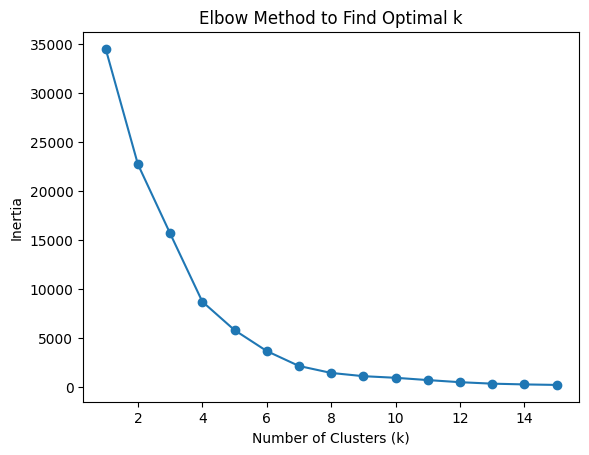

In [ ]:
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.show()

From this graph, we will take the optimal value of k as 6, since there isn't a siginificant decrease in inertia after 6.

In [ ]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=47)
clusters = kmeans.fit_predict(df[columns])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
type(clusters[0])

numpy.int32

In [ ]:
df['cluster'] = clusters

In [ ]:
df

,reviewed_by,reviews_given,avg_expend,negative_reviews,positive_reviews,is_promoter,cluster
0,Amit Kumar,29.282291,0.414324,0,11,0.331851,2
1,Mukesh Kumar,23.396383,-0.346759,1,8,0.331851,2
2,Raj Kumar,23.396383,0.159235,1,8,0.331851,2
3,Pankaj Kumar,17.510475,-0.419044,0,7,0.331851,2
4,Manoj Kumar,17.510475,0.231520,0,7,0.331851,2
...,...,...,...,...,...,...,...
11507,Mohamed Mubarak,-0.147250,0.941227,1,0,-3.013397,1
11508,S MALLI KARJUNA RAJU,-0.147250,0.941227,0,1,0.331851,5
11509,Vijay Mohite,-0.147250,0.941227,0,1,0.331851,5
11510,Omkar Bodkhe,-0.147250,0.941227,0,1,0.331851,5


<h4> Cluster values have been assigned.
<h4> CUSTOMER SEGMENTATION COMPLETE.

Mapping values of "cluster" column in 'df' to a newly created "cluster" column in the main 'data' dataframe.

In [ ]:
cluster_mapping = df.set_index('reviewed_by')['cluster'].to_dict()
data['customer_cluster'] = 0
data['customer_cluster'] = data['reviewed_by'].map(cluster_mapping)

In [ ]:
data.dtypes

description               object
dislikes                   int64
images                     int64
likes                      int64
location                   int64
price                      int64
product                    int64
rating                     int64
review_title              object
reviewed_by               object
polarity                 float64
review_length              int64
word_count                 int64
title_polarity           float64
title_length               int64
title_word_count           int64
avg_word_length          float64
title_avg_word_length    float64
customer_cluster           int64
dtype: object

Now, we will visualise the clusters made and analyse them.

In [ ]:
# df with column values not standardized
customer_df

,reviewed_by,reviews_given,avg_expend,negative_reviews,positive_reviews,is_promoter
0,Amit Kumar,11,17453.545455,0,11,1
1,Mukesh Kumar,9,13776.777778,1,8,1
2,Raj Kumar,9,16221.222222,1,8,1
3,Pankaj Kumar,7,13427.571429,0,7,1
4,Manoj Kumar,7,16570.428571,0,7,1
...,...,...,...,...,...,...
11507,Mohamed Mubarak,1,19999.000000,1,0,0
11508,S MALLI KARJUNA RAJU,1,19999.000000,0,1,1
11509,Vijay Mohite,1,19999.000000,0,1,1
11510,Omkar Bodkhe,1,19999.000000,0,1,1


In [ ]:
customer_df['cluster'] = 0
customer_df['cluster'] = customer_df['reviewed_by'].map(cluster_mapping)

In [ ]:
customer_df['cluster'].value_counts()

0    4642
5    3885
3    1483
1    1141
4     321
2      40
Name: cluster, dtype: int64

# STEP 3.5 : Exploratory Data Analysis of clusters formed.

Visualizing relations between various fetaures.

In [ ]:
import plotly.express as px

In [ ]:
scatter_avg_expend_neg_reviews = px.scatter(customer_df, x='avg_expend', y='negative_reviews', color='cluster',
                                           title='Cluster Analysis: avg_expend vs. negative_reviews')
scatter_avg_expend_neg_reviews.show()

In [ ]:
scatter_avg_expend_pos_reviews = px.scatter(customer_df, x='avg_expend', y='positive_reviews', color='cluster',
                                           title='Cluster Analysis: avg_expend vs. positive_reviews')
scatter_avg_expend_pos_reviews.show()

The customers in the middle are more likely to be authentic reviewers, because they are not deviating from the standard behaviour.
<p> The customers on any of the extremes are highly likely to post fake reviews, or create anomaly.

<h3> Plotting on the basis of total review, average expenditure, promoter/demoter:


In [ ]:
figure = px.scatter_3d(customer_df,
                    color='cluster',
                    x="reviews_given",
                    y="avg_expend",
                    z="is_promoter",
                    category_orders = {"clusters": ["0", "1", "2", "3", "4"]}
                    )
figure.update_layout()
figure.show()

From this plot, we can conclude the following things:
*   Cluster 1 represents Demoters - customers who have more negative reviews than positive ones.
*   Clusters 2-5 represent Promoters - customers who make positive reviews.



Further conclusions that can be drawn:
*   Cluster 2 contains customers who post several reviews.
*   Cluster 3 contains customers who spend little and promote the product. These are likely to be fake ID's created to promote the brand.
*   Clusters 0 and 5 spend a lot and post limited number of comments, so they are not very likely to be unusual customer or fake reviewers as their behaviours represents that of loyal customers.
*   Cluster 4 is also not very likely to have fake reviewers as they post an intermediate amount of reviews and don't spend too little or too much.

In [ ]:
data['product'].value_counts()

3    3201
2    2871
0    2245
4    1807
6    1708
5     246
1      10
Name: product, dtype: int64

Since, there are only 7 unique products, customers with high number of reviews (>=7) are highly likely to be spammers, who post fake reviews.

<h4>Customers belonging to cluster 2 are higly likely to be fake reviewers.

<h3> Using Isolation Forest model to detect for possible anomalies as part of EDA of customer dataframe (df):

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import IsolationForest

In [ ]:
cust_temp = customer_df.copy()

In [ ]:
features_for_outlier_detection = ['reviews_given','avg_expend', 'positive_reviews', 'negative_reviews']
outlier_detection_df = cust_temp[features_for_outlier_detection]
isolation_forest = IsolationForest(contamination=0.1)
outlier_labels = isolation_forest.fit_predict(outlier_detection_df)

cust_temp['is_outlier'] = outlier_labels

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



In [ ]:
cust_temp

,reviewed_by,reviews_given,avg_expend,negative_reviews,positive_reviews,is_promoter,cluster,is_outlier
0,Amit Kumar,11,17453.545455,0,11,1,2,-1
1,Mukesh Kumar,9,13776.777778,1,8,1,2,-1
2,Raj Kumar,9,16221.222222,1,8,1,2,-1
3,Pankaj Kumar,7,13427.571429,0,7,1,2,-1
4,Manoj Kumar,7,16570.428571,0,7,1,2,-1
...,...,...,...,...,...,...,...,...
11507,Mohamed Mubarak,1,19999.000000,1,0,0,1,-1
11508,S MALLI KARJUNA RAJU,1,19999.000000,0,1,1,5,1
11509,Vijay Mohite,1,19999.000000,0,1,1,5,1
11510,Omkar Bodkhe,1,19999.000000,0,1,1,5,1


In [ ]:
cust_temp['is_outlier'].value_counts()

 1    10679
-1      833
Name: is_outlier, dtype: int64

In [ ]:
outliers = cust_temp[cust_temp['is_outlier']==-1]
outliers

,reviewed_by,reviews_given,avg_expend,negative_reviews,positive_reviews,is_promoter,cluster,is_outlier
0,Amit Kumar,11,17453.545455,0,11,1,2,-1
1,Mukesh Kumar,9,13776.777778,1,8,1,2,-1
2,Raj Kumar,9,16221.222222,1,8,1,2,-1
3,Pankaj Kumar,7,13427.571429,0,7,1,2,-1
4,Manoj Kumar,7,16570.428571,0,7,1,2,-1
...,...,...,...,...,...,...,...,...
11407,Vikas Panwar,1,19999.000000,1,0,0,1,-1
11411,Nataraj R,1,19999.000000,1,0,0,1,-1
11455,Chotu Gupta,1,19999.000000,1,0,0,1,-1
11461,Md. Babar,1,19999.000000,1,0,0,1,-1


In [ ]:
outliers['is_promoter'].value_counts()

0    473
1    360
Name: is_promoter, dtype: int64

We can infer that promoters (customers who post several positive reviews) are more likely to post fake reviews.

In [ ]:
outliers['avg_expend'].mean()

17192.85728317301

In [ ]:
outliers['cluster'].value_counts()

1    472
4    321
2     40
Name: cluster, dtype: int64

<p> We can observe that maximum potential anomalies belong to clusters 1, 2, which were deduced to have possible fake reviewers.
<p> Customers belonging to clusters 0,3,5 are not very likely to post fake reviews.

Cluster 4 was deduced as not likely to contain fake reviewers, but it has several anomalous entries. This might be due to some factors that we cannot analyse via exploratory analysis.
<p> This analysis alone, is not enough to categorize reviews as fake, so we will now analyse the reviews dataset.

<h4> Conclusion: Customers from clusters 1, 2 and 4 are most likely to be fake reviewers.

<h4> End of Customer Segmentation (on the basis of reviewing behaviour parameters) and Exploratory Data Analysis of customer dataframe to determine the kind of customers most likely to post fake reviews.

# STEP 4 : FAKE REVIEW DETECTION USING UNSUPERVISED MACHINE LEARNING MODEL

<h4>ANOMALY DETECTION on main reviews dataset "data":

In [ ]:
text = data['description']
vectorizer = TfidfVectorizer(max_features=5000)
text_vectorized = vectorizer.fit_transform(text)
contamination_values = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5]

Checking for different values of contamination parameter.

In [ ]:
for contamination in contamination_values:
    isolation_forest = IsolationForest(contamination=contamination, random_state=42)
    isolation_forest.fit(text_vectorized)
    anomaly_predictions = isolation_forest.predict(text_vectorized)
    num_fake_reviews = len(anomaly_predictions[anomaly_predictions == -1])

    print(f"Contamination={contamination:.2f}, Number of potential fake reviews: {num_fake_reviews}")

Contamination=0.01, Number of potential fake reviews: 121
Contamination=0.02, Number of potential fake reviews: 242
Contamination=0.05, Number of potential fake reviews: 605
Contamination=0.10, Number of potential fake reviews: 1209
Contamination=0.20, Number of potential fake reviews: 2418
Contamination=0.50, Number of potential fake reviews: 6044


Since the dataset in unlabelled, the anomaly detection relies completely on the contamination parameter.
<p> This alone will not result in accurate deductions.

In [ ]:
data

,description,dislikes,images,likes,location,price,product,rating,review_title,reviewed_by,polarity,review_length,word_count,title_polarity,title_length,title_word_count,avg_word_length,title_avg_word_length,customer_cluster
0,camera quality awesome it generates good co...,126,1,706,2593,13999,0,5,super,Humayun Khariwala,0.525000,382,66,0.333333,5,1,4.515152,5.000000,0
1,awesome mobile i got it with in days shappir...,55,1,200,2448,13999,0,5,terrific purchase,B.Sundar Ahmed,0.632941,445,75,0.000000,17,2,4.906667,8.000000,0
2,honor lite pros cameras are good mp camera a...,2,0,28,320,13999,0,4,delightful,Chethan Raj,0.516667,453,78,1.000000,10,1,4.551282,10.000000,0
3,superb camera beautiful and slim design light ...,4,1,26,1306,13999,0,5,brilliant,Akash Mondal,0.633333,167,31,0.900000,9,1,4.419355,9.000000,0
4,good and best mobil honor is best company,1,1,10,467,13999,0,5,must buy,Manish varmora Ramjibhai,0.900000,41,8,0.000000,8,2,4.250000,3.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15161,awesome camera good quality but should improve...,0,0,0,2445,19999,6,4,good choice,Alen Jose anto,0.700000,64,10,0.700000,11,2,5.500000,5.000000,5
15162,just fantastic mobile at this rate only minus ...,0,0,0,2611,19999,6,5,best in the market,rajkumar jayachandran,0.087500,77,14,1.000000,18,4,4.571429,3.750000,5
15163,nine device only one con no grayoscope,0,0,0,137,19999,6,4,worth the money,Sagar Patil,0.000000,39,7,0.300000,15,3,4.571429,4.333333,4
15164,awesome phone nice cameras and touch is like i...,0,0,0,2415,19999,6,5,terrific,Nikhil Chaudhari,0.800000,51,9,0.000000,8,1,4.777778,8.000000,5


On the basis of domain knowledge and prior research, factors like price of product, location of reviewer and name of reviewer are not relevant to the detection of fake reviews.

In [ ]:
data = data.drop(columns = ['price','reviewed_by','location','product'])

We will be working on the review description and the numerical data related to review title (Title sentiment, word length, word count etc.) so there is no need for the the "review_title column.

In [ ]:
data = data.drop(columns = ['review_title'])

Vectorizing the text to fit it into Isolation Forest model.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['description'])
X_dense = X.toarray()
model = IsolationForest()
model.fit(X_dense)
anomaly_scores = model.decision_function(X_dense)

In [ ]:
anomaly_scores

array([0.15723699, 0.1151861 , 0.10146631, ..., 0.2014996 , 0.19511475,
       0.20502836])

In [ ]:
anomaly_scores.mean()

0.19549860375817565

In [ ]:
anomaly_scores.min()

0.07198361358834493

In [ ]:
anomaly_scores.max()

0.2059322983312074

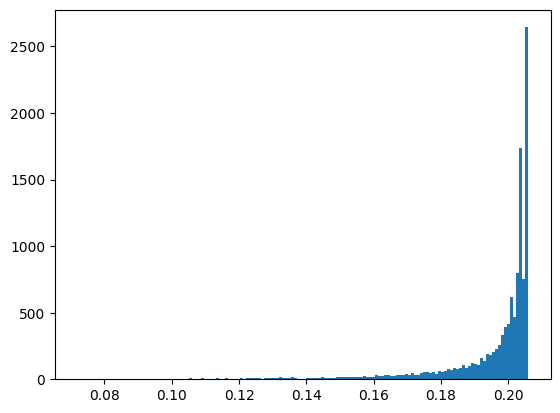

In [ ]:
plt.hist(anomaly_scores, bins=150)
plt.show()

Potentially fake reviews have a higher chance of having high or unusually high anomaly scores.

Based on this deduction we will set the threshold as 0.199

In [ ]:
data['is_anomaly'] = 0
threshold = 0.199
data.loc[anomaly_scores > threshold, 'is_anomaly'] = 1

In [ ]:
data['is_anomaly'].value_counts()

1    7760
0    4328
Name: is_anomaly, dtype: int64

<h3> We will use unsupervised learning algorithms to divide the review data into clusters and perform detailed analysis of the clusters to categorize reviews as fake or real.

In [ ]:
columns = ['dislikes', 'images', 'likes', 'rating', 'polarity', 'review_length', 'word_count', 'avg_word_length', 'title_polarity', 'title_length', 'title_word_count', 'title_avg_word_length', 'customer_cluster']

In [ ]:
inertia = []

max_clusters = 15
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=60)
    kmeans.fit(data[columns])
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

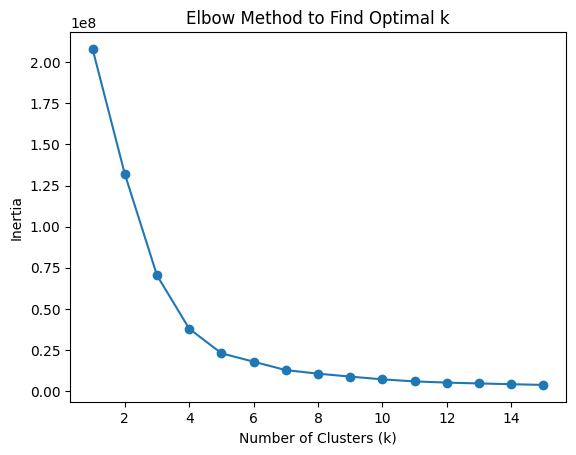

In [ ]:
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.show()

The change in inertia becomes less significant from 5 clusters onwards.

<h4> Using the Elbow Technique, we will select the optimal number of clusters to be = 5.

<h3> K-MEANS CLUSTERING:

In [ ]:
X = data[columns]

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
data['cluster']

0        2
1        2
2        2
3        0
4        3
        ..
15161    3
15162    3
15163    3
15164    3
15165    3
Name: cluster, Length: 12088, dtype: int32

In [ ]:
data['cluster'].value_counts()

3    9716
0    1868
2     488
4      15
1       1
Name: cluster, dtype: int64

In [ ]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns)
print(cluster_centers)

      dislikes    images        likes    rating  polarity  review_length  \
0     0.613904  0.076471     1.836364  3.802674  0.311877     140.579144   
1  1401.000000  0.000000  7718.000000  5.000000  0.325714     308.000000   
2     4.006135  0.155419    10.384458  3.781186  0.250084     375.662577   
3     0.228869  0.058478     0.853289  4.280037  0.473739      22.826933   
4   346.600000  0.666667  1733.266667  4.866667  0.482942     226.400000   

   word_count  avg_word_length  title_polarity  title_length  \
0   25.109091         4.682952        0.333708     12.904278   
1   48.000000         5.395833        0.700000     11.000000   
2   67.044990         4.584609        0.350565     13.372188   
3    4.159271         4.780710        0.432820     12.244312   
4   38.533333         4.915157        0.475222     13.066667   

   title_word_count  title_avg_word_length  customer_cluster  
0          2.008556               6.527931          1.789840  
1          2.000000             

In [ ]:
cluster_analysis = data.groupby('cluster').mean()
cluster_analysis

<ipython-input-593-f59aa22ef60a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,dislikes,images,likes,rating,polarity,review_length,word_count,title_polarity,title_length,title_word_count,avg_word_length,title_avg_word_length,customer_cluster,is_anomaly
cluster,,,,,,,,,,,,,,
0,0.615632,0.076552,1.838330,3.802463,0.311918,140.736081,25.140257,0.333744,12.910600,2.009101,4.681710,6.529835,1.788544,0.013919
1,1401.000000,0.000000,7718.000000,5.000000,0.325714,308.000000,48.000000,0.700000,11.000000,2.000000,5.395833,5.000000,5.000000,0.000000
2,4.010246,0.155738,10.403689,3.778689,0.249323,375.903689,67.086066,0.349234,13.385246,2.127049,4.584848,6.467753,1.194672,0.000000
3,0.228798,0.058460,0.853129,4.280054,0.473713,22.845204,4.162001,0.432851,12.242692,1.871449,4.780897,6.622947,2.498456,0.795904
4,346.600000,0.666667,1733.266667,4.866667,0.482942,226.400000,38.533333,0.475222,13.066667,2.000000,4.915157,6.566667,2.466667,0.066667


In [ ]:
cluster_temp = cluster_analysis
cluster_temp['cluster_index'] = range(cluster_temp.shape[0])

In [ ]:
cluster_temp

,dislikes,images,likes,rating,polarity,review_length,word_count,title_polarity,title_length,title_word_count,avg_word_length,title_avg_word_length,customer_cluster,is_anomaly,cluster_index
cluster,,,,,,,,,,,,,,,
0,0.615632,0.076552,1.838330,3.802463,0.311918,140.736081,25.140257,0.333744,12.910600,2.009101,4.681710,6.529835,1.788544,0.013919,0
1,1401.000000,0.000000,7718.000000,5.000000,0.325714,308.000000,48.000000,0.700000,11.000000,2.000000,5.395833,5.000000,5.000000,0.000000,1
2,4.010246,0.155738,10.403689,3.778689,0.249323,375.903689,67.086066,0.349234,13.385246,2.127049,4.584848,6.467753,1.194672,0.000000,2
3,0.228798,0.058460,0.853129,4.280054,0.473713,22.845204,4.162001,0.432851,12.242692,1.871449,4.780897,6.622947,2.498456,0.795904,3
4,346.600000,0.666667,1733.266667,4.866667,0.482942,226.400000,38.533333,0.475222,13.066667,2.000000,4.915157,6.566667,2.466667,0.066667,4


# STEP 5 : EXPLORATORY DATA ANALYSIS OF CLUSTERS TO DETECT FAKE REVIEWS.

ANALYSIS OF NUMBER OF LIKES AND DISLIKES ON A REVIEW:

Plotting Graphs to visualise:
1. The frequency of a particular range of 'likes' and 'dislikes' values
2. The average number of likes per cluster.

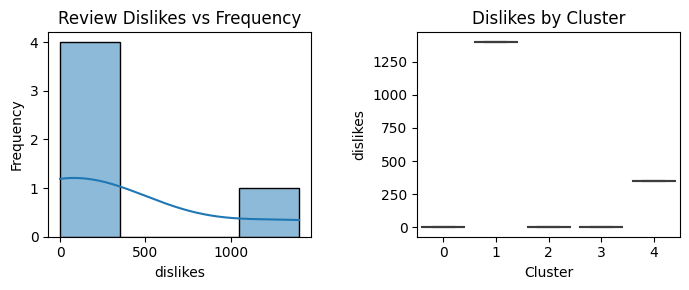

In [ ]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['dislikes'], kde=True)
plt.title('Review Dislikes vs Frequency')
plt.xlabel('dislikes')
plt.ylabel('Frequency')

numerical_column = 'dislikes'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'Dislikes by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()

Most reviews (80%) have 0 to 400 dislikes, while 20% reviews have more than 1000 dislikes.

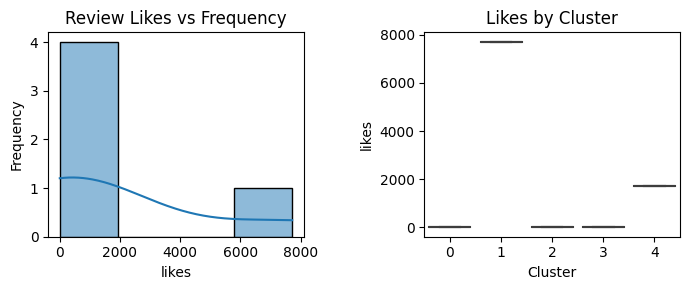

In [ ]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['likes'], kde=True)
plt.title('Review Likes vs Frequency')
plt.xlabel('likes')
plt.ylabel('Frequency')

numerical_column = 'likes'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'Likes by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()

Most reviews (80%) have 0 to 2000 likes, while 20% reviews have number of likes in the range 6000 to 8000 (approximately).

In [ ]:
cluster_analysis[['dislikes', 'likes']]

,dislikes,likes
cluster,,
0,0.615632,1.838330
1,1401.000000,7718.000000
2,4.010246,10.403689
3,0.228798,0.853129
4,346.600000,1733.266667


* ***Cluster 1*** has extreme values which are largely differing from the other cluster values.
<p> Reviews having unusually large number of likes can be fake reviews generated to promote certain brands or products.
<p> Hence, Cluster 1 is highly likely to contain anomalous reviews.

* ***Cluster 3*** reviews have close to no dislikes or likes. These reviews might be fake since no customers found them helpful. However, this alone is not enough to make a certain deduction.

*   ***Cluster 4*** may also contain some amount of fake reviews for promotions, but we shall require some more exploration to come to a certain conclusion.

<h4> IMAGE COLUMN ANALYSIS:

Plotting Graphs to visualise:
1. The frequency of a particular range of 'images' values
2. The average number of likes per cluster.

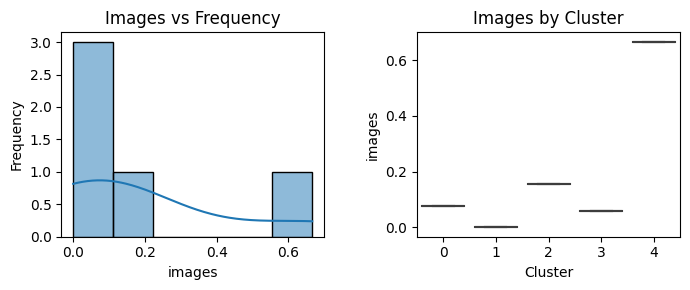

In [ ]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['images'], kde=True)
plt.title('Images vs Frequency')
plt.xlabel('images')
plt.ylabel('Frequency')

numerical_column = 'images'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'Images by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()

1 represents the review contains one or more images.
<p> 0 represents the review doesn't contain images.

A majority of reviews do not contain images.

In [ ]:
cluster_analysis['images']

cluster
0    0.076552
1    0.000000
2    0.155738
3    0.058460
4    0.666667
Name: images, dtype: float64

Reviews containing images are less likely to be fake as compared to those containing images.
*   Clusters 0 and ***3*** contain a low number of reviews with images. These 2 clusters may contain fake reviews.
*   ***Cluster 1*** contains reviews with no images, hence it is highly likely to contain only fake reviews.
*   ***Cluster 4*** contains an unusually high number of images as compared to other clusters. Extreme values which differ largely from others in the dataset are bound to be anomalous. Hence, Cluster 4 is bound to contain some fake reviews.

<h4> RATING ANALYSIS:

In [ ]:
cluster_analysis['rating']

cluster
0    3.802463
1    5.000000
2    3.778689
3    4.280054
4    4.866667
Name: rating, dtype: float64

*   Cluster 1 contains only 5 star-reviews, which is anomalous due to the extremity in its rating. Therefore, it is highly probably that Cluster 1 will contain a significant number of fake reviews.
*   Cluster 4 also has a very high average rating value, which was likely caused by a large number of fake reviews generated for promotions.

<h4> ANALYSIS OF REVIEW CLUSTERS ON THE BASIS OF CUSTOMER CLUSTERS (BEHAVIOUR OF CUSTOMERS WHO POSTED THE REVIEWS):

POINTS TO REMEMBER:
*   'cluster' - clusters of reviews based on review data.
*   'customer_cluster' - clusters of customers, on the basis of their review-posting behaviour.

In [ ]:
cluster_analysis['customer_cluster']

cluster
0    1.788544
1    5.000000
2    1.194672
3    2.498456
4    2.466667
Name: customer_cluster, dtype: float64

In [ ]:
cluster_counts = cluster_temp['cluster_index'].value_counts()
total_reviews_in_cluster = cluster_counts.sum()
percentage_cluster_1 = (cluster_counts[1] / total_reviews_in_cluster) * 100
percentage_cluster_1

20.0

In [ ]:
# Number of customers from each Customer Cluster, belonging to Review Cluster 0
data[data['cluster']==0]['customer_cluster'].value_counts()

0    824
5    385
1    304
3    232
4     85
2     38
Name: customer_cluster, dtype: int64

*   We had earlier deemed customer clusters 2 and 4 as the most probable fake reviewers.
*   <p> Since, this cluster contains a small minority of those two customer clusters, it is not likely to contain fake reviews.

In [ ]:
# Number of customers from each Customer Cluster, belonging to Review Cluster 1
data[data['cluster']==1]['customer_cluster'].value_counts()

5    1
Name: customer_cluster, dtype: int64

*   Review Cluster 1 contains only 1 value which corresponds to Customer Cluster 5, which was deemed as not likely to contain fake reviewers.
*   <p> However, cluster 1 is highly likely to contain fake reviews on the basis of other paramters, so we shall explore this further.

In [ ]:
# Number of customers from each Customer Cluster, belonging to Review Cluster 2
data[data['cluster']==2]['customer_cluster'].value_counts()

0    300
5     62
1     57
3     40
4     19
2     10
Name: customer_cluster, dtype: int64

*   Cluster 2 doesn't show any unusual values to make a conclusion.

In [ ]:
# Number of customers from each Customer Cluster, belonging to Review Cluster 3
data[data['cluster']==3]['customer_cluster'].value_counts()

0    3511
5    3430
3    1211
1     812
4     588
2     164
Name: customer_cluster, dtype: int64

*   Customer cluster 2 represents customers who post a large number of positive reviews and customer cluster 3 represents customers who spend little and promote the product.
*   <p> Customer clusters 2 and 3 are more dominant here (in this cluster), as compared to the other review clusters. That is, most entries from customer clusters 2 and 3 belong to this cluster (3).
*   <p> However, this cluster is dominated by customers from customer clusters 0 and 5, so this deduction is not bound to have a large impact in determining if a review in cluster 3 is fake or not.
<p> Hence, cluster 3 may contain a small number of fake reviews, but won't be dominant in our analysis.

In [ ]:
# Number of customers from each Customer Cluster, belonging to Review Cluster 4
data[data['cluster']==4]['customer_cluster'].value_counts()

0    7
5    7
2    1
Name: customer_cluster, dtype: int64

*   We deduced that cluster 4 contains some extreme values which might mean it has fake promotional reviews, but it doesn't exhibit unusual behaviour on the basis of this feature.
<p> Hence, this needs to be explored further.

On the basis of customer clusters, 0 and 5, which include customers who spend a lot, but post only 1-2 positive reviews, are dominant in every set of review clusters. There is not much distinction solely on the basis of these two parameters.

<h4> POLARITY ANALYSIS:

Plotting Graphs to visualise:
1. The frequency of a particular range of 'polarity' values
2. The average number of likes per cluster.

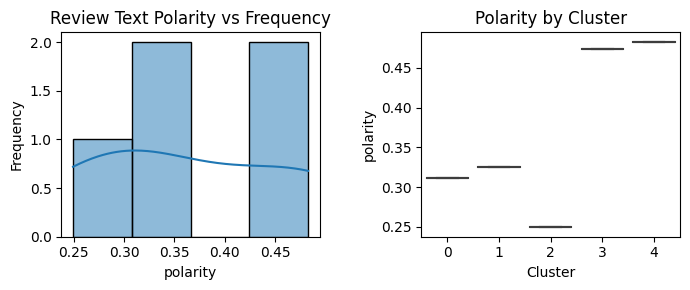

In [ ]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['polarity'], kde=True)
plt.title('Review Text Polarity vs Frequency')
plt.xlabel('polarity')
plt.ylabel('Frequency')

numerical_column = 'polarity'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'Polarity by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()

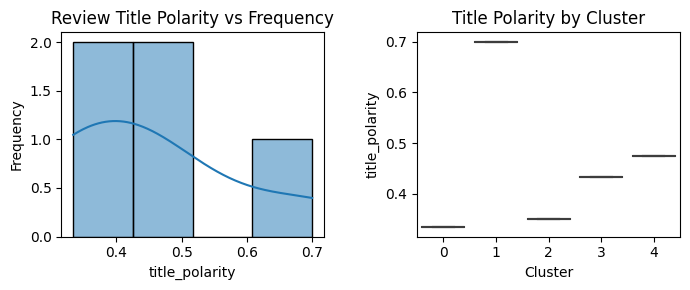

In [ ]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['title_polarity'], kde=True)
plt.title('Review Title Polarity vs Frequency')
plt.xlabel('title_polarity')
plt.ylabel('Frequency')

numerical_column = 'title_polarity'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'Title Polarity by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()

In [ ]:
cluster_analysis[['polarity', 'title_polarity']]

,polarity,title_polarity
cluster,,
0,0.311918,0.333744
1,0.325714,0.700000
2,0.249323,0.349234
3,0.473713,0.432851
4,0.482942,0.475222


*   Here, the review text and review title of ***cluster 1*** have highly contrasting polarities.
<p> This is likely to be a fake review cluster since the sentiments of title and text don't match. It could've been created to mislead other customers.
*   Clusters 2 and 3 also have a noteworthy difference in review text and title polarities. These shall be explored further on the basis of other features.
*   ***Cluster 4*** has review text containing the most extreme polarity. It may potentially contain fake reviews which are exaggerated and do not represent genuine opinions.

<h4> TEXT PROPERTIES ANALYSIS:

Plotting Graphs to visualise:
1. The frequency of a particular range of values of various properties of review text and title.
2. The average number of likes per cluster.

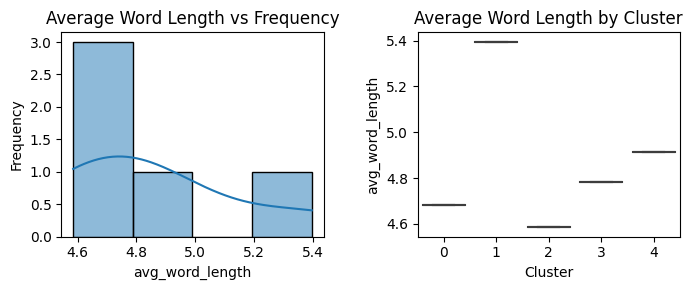

In [ ]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['avg_word_length'], kde=True)
plt.title('Average Word Length vs Frequency')
plt.xlabel('avg_word_length')
plt.ylabel('Frequency')

numerical_column = 'avg_word_length'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'Average Word Length by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()

Majority of reviews have an average word length of 4.6 to 4.8

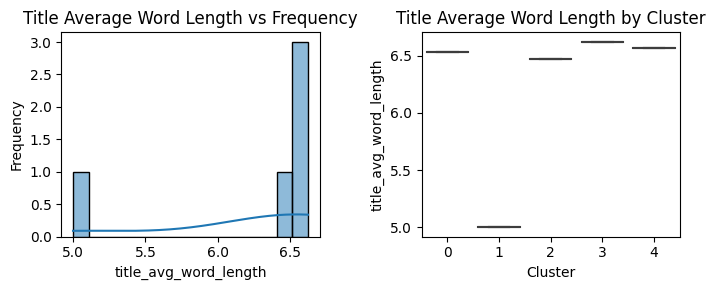

In [ ]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['title_avg_word_length'], kde=True)
plt.title('Title Average Word Length vs Frequency')
plt.xlabel('title_avg_word_length')
plt.ylabel('Frequency')

numerical_column = 'title_avg_word_length'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'Title Average Word Length by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()

Majority of titles contain approximately 6.5 words on an average.

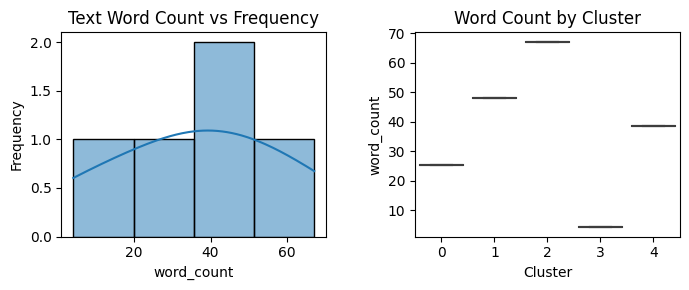

In [ ]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['word_count'], kde=True)
plt.title('Text Word Count vs Frequency')
plt.xlabel('word_count')
plt.ylabel('Frequency')

numerical_column = 'word_count'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'Word Count by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()

Most review texts contain around 40 words.

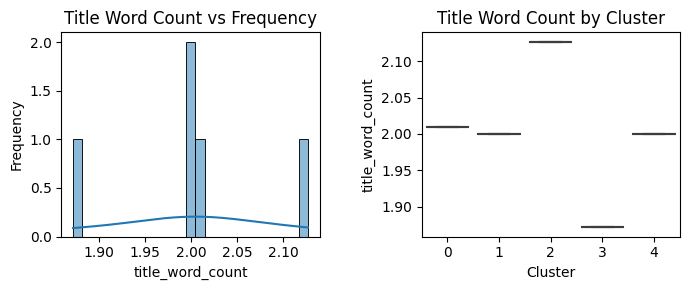

In [ ]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['title_word_count'], kde=True)
plt.title('Title Word Count vs Frequency')
plt.xlabel('title_word_count')
plt.ylabel('Frequency')

numerical_column = 'title_word_count'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'Title Word Count by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()

Most titles contain two words.

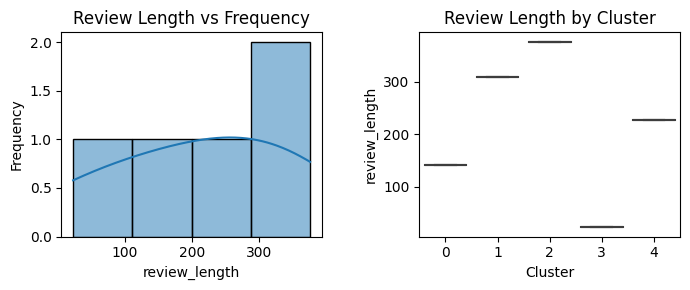

In [ ]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['review_length'], kde=True)
plt.title('Review Length vs Frequency')
plt.xlabel('review_length')
plt.ylabel('Frequency')

numerical_column = 'review_length'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'Review Length by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()

A large number of reviews have more than 300 characters.

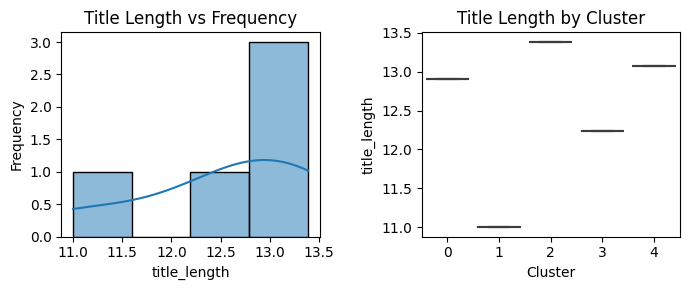

In [ ]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['title_length'], kde=True)
plt.title('Title Length vs Frequency')
plt.xlabel('title_length')
plt.ylabel('Frequency')

numerical_column = 'title_length'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'Title Length by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()

Majority of titles are more than 12 words in length.

In [ ]:
cluster_analysis[['review_length',	'title_length',
                  'title_word_count',	'word_count',
                  'avg_word_length',	'title_avg_word_length',
                  'is_anomaly']]

,review_length,title_length,title_word_count,word_count,avg_word_length,title_avg_word_length,is_anomaly
cluster,,,,,,,
0,140.736081,12.910600,2.009101,25.140257,4.681710,6.529835,0.013919
1,308.000000,11.000000,2.000000,48.000000,5.395833,5.000000,0.000000
2,375.903689,13.385246,2.127049,67.086066,4.584848,6.467753,0.000000
3,22.845204,12.242692,1.871449,4.162001,4.780897,6.622947,0.795904
4,226.400000,13.066667,2.000000,38.533333,4.915157,6.566667,0.066667


* Clusters with large reviews are likely to be more detailed and descriptive, which would rule them out from containing fake reviews.
However, we shall consider all other factors/features in our making our final deduction.

*   ***Cluster 3*** has extremely low values of review length and review word counts which could imply less informative or potentially fake reviews. Further, its value of 'is_anomaly' is very close to 1, which means that it is likely to contain unusual or extreme entries.

### CONCLUSION:
*   #### Review Clusters 0 and 4 certainly contain fake reviews.
*   #### Review Cluster 3 contains a large number of values, out of which, it is bound to contain a significant amount of fake reviews.

### On the basis of our detailed analysis of the results obtained from a pipeline of 2 Machine Learning Models (Isolation Forest and KMeans Clustering), we can conclude that:
*   #### Customers exhibiting extreme or unusual behaviours, deviating from the trends are most likely to upload fake reviews.
*   #### Customers who post a lot of reviews with exaggerated texts and extreme sentiments are most likely to be fake reviewers.
*   #### Reviews containing images are less likely to be fake as compared to those with images.
*   #### Reviews which have an abnormally large number of likes, dislikes or extreme ratings are likely those which were promoted by non-genuine reviewers.